# Employee Retention Prediction

* In this notebook we are going to build 4 different models and compare their performances, the models are:
* LogisticRegression
* RandomeForestClassifier
* Simple tensorflow model
* Deeper tensorflow model

In conclusion, the RandomForestClassifier model and the Deeper tensorflow model perform relatively better than the other models.


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split

In [2]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 794.1 kB/s eta 0:00:00a 0:00:01


In [3]:
import openpyxl

In [4]:
hr_df = pd.read_csv('data/hr_data.csv', index_col=0) 
#file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv"
#hr_df = pd.read_csv(file_name)
hr_df.head(10)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
5,1060,2,153,3,0,1,0,sales,low
6,1061,6,247,4,0,1,0,sales,low
7,1576,5,259,5,0,1,0,sales,low
8,1752,5,224,5,0,1,0,sales,low
9,1988,2,142,3,0,1,0,sales,low


In [5]:
hr_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [6]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.1+ MB


### Categorical columns

In [7]:
hr_df.select_dtypes(exclude=['int', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [8]:
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [9]:
hr_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
hr_df.shape

(14999, 9)

In [11]:
cols = hr_df.columns
cols

Index(['employee_id', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'department', 'salary'],
      dtype='object')

### Load Evaluation and Employee Satisfaction Data

In [12]:
emp_satis_eval = pd.read_excel('data/employee_satisfaction_evaluation.xlsx') 

#file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx"
#emp_satis_eval = pd.read_excel(file_name)

emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [13]:
emp_satis_eval.shape

(14999, 3)

### Merge tables

In [14]:
emp_satis_eval.columns = ['employee_id', 'satisfaction_level', 'last_evaluation']
main_df = pd.merge(hr_df, emp_satis_eval, on="employee_id")
print(main_df.shape)
main_df.head()

(14999, 11)


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [15]:
main_df.isnull().values.any()

True

### Is our dataset good? Are there missing values?

In [16]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


### Let's fill in the missing blanks with the aveage values

In [17]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Impute missing values with mean

In [18]:
main_df.fillna(main_df.mean(), inplace=True)
main_df.head()

/tmp/ipykernel_91/2431407480.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  main_df.fillna(main_df.mean(), inplace=True)


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [19]:
main_df.loc[main_df['employee_id'] == 1003]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53


In [20]:
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [21]:
# Removing employee ID
main_df_final = main_df.drop(columns='employee_id')
main_df_final.head()
#main_df_final['salary'].value_counts()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [22]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [23]:
main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [24]:
main_df_final['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [25]:
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

### Displaying Your Correlation Matrix

In [26]:
corr = main_df_final.corr()
corr

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
number_project,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.143895,0.348776
average_montly_hours,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.020886,0.339014
time_spend_company,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.101165,0.131078
Work_accident,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.059063,-0.006779
left,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.388282,0.006876
promotion_last_5years,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.025925,-0.007815
satisfaction_level,-0.143895,-0.020886,-0.101165,0.059063,-0.388282,0.025925,1.000000,0.103783
last_evaluation,0.348776,0.339014,0.131078,-0.006779,0.006876,-0.007815,0.103783,1.000000


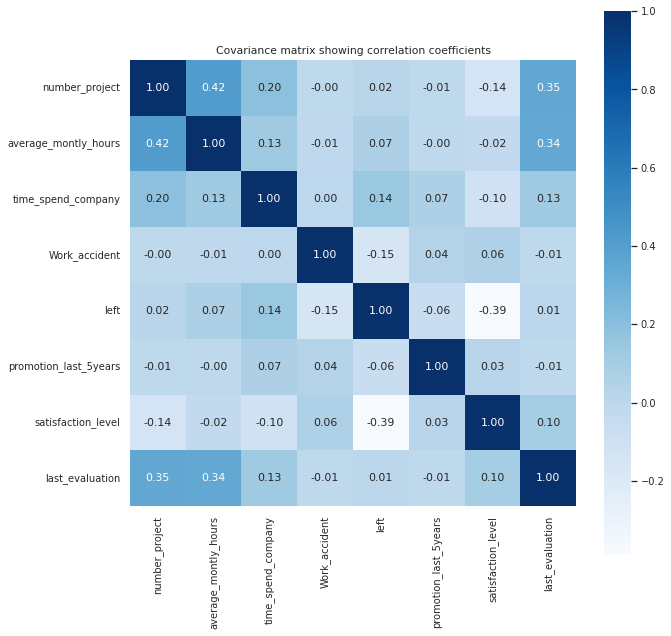

In [27]:
corr_cols = ['number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'satisfaction_level', 'last_evaluation']
plt.figure(figsize=(10, 10), dpi=600)
sns.set(font_scale=0.9)
hm = sns.heatmap(corr,
                 cbar=True,
                 annot=True,
                 square=True,
                 cmap="Blues",
                 fmt='.2f',
                 annot_kws={'size': 11},
                 yticklabels=corr_cols,
                 xticklabels=corr_cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.show()

### One hot encode the categorical columns

In [28]:
def one_hot_encode(df, cat_cols, enc=None, drop=True):
    if not enc:
        enc = OneHotEncoder(handle_unknown='ignore')
        enc.fit(df[cat_cols])

    arry = enc.transform(df[cat_cols]).toarray()
    cat_columns = enc.get_feature_names_out(cat_cols)
    tmp_df = pd.DataFrame(arry, columns=cat_columns)

    df.reset_index(inplace=True, drop=True)
    df = pd.concat([df, tmp_df], axis=1)

    if drop:
        df.drop(cat_cols, axis=1, inplace=True)
    return enc, df


encoder, tmp = one_hot_encode(main_df_final, ['department','salary'])
tmp.head(10)

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5,262,6,0,1,0,0.80,0.86,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,7,272,4,0,1,0,0.11,0.88,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,5,223,5,0,1,0,0.72,0.87,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2,159,3,0,1,0,0.37,0.52,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,2,153,3,0,1,0,0.41,0.50,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,6,247,4,0,1,0,0.10,0.77,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,5,259,5,0,1,0,0.92,0.85,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,5,224,5,0,1,0,0.89,1.00,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,2,142,3,0,1,0,0.42,0.53,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Preparing out  Dataset for ML

In [29]:
main_df_final_old = main_df_final
main_df_final = tmp
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5,262,6,0,1,0,0.80,0.86,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,7,272,4,0,1,0,0.11,0.88,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,5,223,5,0,1,0,0.72,0.87,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2,159,3,0,1,0,0.37,0.52,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Number of columns, target column included

In [30]:
len(main_df_final.columns)

21

### The number of employees who have left

In [31]:
len(main_df_final.loc[main_df_final['left'] == 1])

3571

In [32]:
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5,262,6,0,1,0,0.80,0.86,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,7,272,4,0,1,0,0.11,0.88,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,5,223,5,0,1,0,0.72,0.87,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2,159,3,0,1,0,0.37,0.52,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [33]:
main_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_project          14999 non-null  int64  
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   satisfaction_level      14999 non-null  float64
 7   last_evaluation         14999 non-null  float64
 8   department_IT           14999 non-null  float64
 9   department_RandD        14999 non-null  float64
 10  department_accounting   14999 non-null  float64
 11  department_hr           14999 non-null  float64
 12  department_management   14999 non-null  float64
 13  department_marketing    14999 non-null  float64
 14  department_product_mng  14999 non-null

## Preparing our Dataset for Machine Learning

In [34]:
# We remove the label values from our training data
X = main_df_final.drop(['left'], axis=1).values

# We assigned those label values to our Y dataset
y = main_df_final['left'].values


In [35]:
cols = main_df_final.drop(['left'], axis=1).columns

In [36]:
# Split it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [37]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fit(raw_documents[, y]): Learn a vocabulary dictionary of all tokens in the raw documents.
# fit_transform(raw_documents[, y]): Learn the vocabulary dictionary and return term-document matrix. This is equivalent to fit followed by the transform, but more efficiently implemented.

In [38]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.650837,-0.777713,0.340641,2.437046,-0.146636,-0.369380,-0.215764,-0.297183,-0.234217,-0.234895,-0.220311,-0.21284,-0.245978,-0.252018,-0.617026,-0.420421,2.118546,-0.302841,1.027132,-0.867446
1,1.767117,2.000324,1.023940,-0.410333,-0.146636,-2.053603,0.427144,-0.297183,4.269536,-0.234895,-0.220311,-0.21284,-0.245978,-0.252018,-0.617026,-0.420421,-0.472022,-0.302841,-0.973584,1.152810
2,0.961132,-0.397981,0.340641,-0.410333,-0.146636,1.074240,0.018021,-0.297183,-0.234217,-0.234895,-0.220311,-0.21284,-0.245978,-0.252018,-0.617026,-0.420421,2.118546,-0.302841,1.027132,-0.867446
3,0.155148,0.321510,-1.025957,2.437046,-0.146636,0.071726,0.251806,3.364932,-0.234217,-0.234895,-0.220311,-0.21284,-0.245978,-0.252018,-0.617026,-0.420421,-0.472022,-0.302841,-0.973584,1.152810
4,-1.456822,-1.097487,-0.342658,-0.410333,-0.146636,-0.890687,-0.975566,-0.297183,-0.234217,-0.234895,-0.220311,-0.21284,-0.245978,-0.252018,1.620678,-0.420421,-0.472022,-0.302841,1.027132,-0.867446


In [39]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,3.744134e-16,1.823583e-16,-4.647730e-16,-1.305990e-15,-3.715530e-16,3.287693e-14,1.732390e-14,1.103878e-16,1.018177e-15,-2.422843e-16,-1.455815e-15,-2.915670e-16,4.271118e-16,1.328165e-16,1.826248e-15,1.234580e-15,-7.011145e-16,2.765882e-16,-2.862322e-16,2.817063e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.456822e+00,-2.096781e+00,-1.025957e+00,-4.103328e-01,-1.466364e-01,-2.093703e+00,-2.086044e+00,-2.971828e-01,-2.342175e-01,-2.348955e-01,-2.203109e-01,-2.128396e-01,-2.459777e-01,-2.520178e-01,-6.170257e-01,-4.204213e-01,-4.720218e-01,-3.028409e-01,-9.735843e-01,-8.674457e-01
25%,-6.508371e-01,-8.976283e-01,-3.426583e-01,-4.103328e-01,-1.466364e-01,-6.901841e-01,-9.171194e-01,-2.971828e-01,-2.342175e-01,-2.348955e-01,-2.203109e-01,-2.128396e-01,-2.459777e-01,-2.520178e-01,-6.170257e-01,-4.204213e-01,-4.720218e-01,-3.028409e-01,-9.735843e-01,-8.674457e-01
50%,1.551477e-01,-1.824979e-02,-3.426583e-01,-4.103328e-01,-1.466364e-01,1.118270e-01,1.802063e-02,-2.971828e-01,-2.342175e-01,-2.348955e-01,-2.203109e-01,-2.128396e-01,-2.459777e-01,-2.520178e-01,-6.170257e-01,-4.204213e-01,-4.720218e-01,-3.028409e-01,-9.735843e-01,-8.674457e-01
75%,9.611324e-01,8.811146e-01,3.406408e-01,-4.103328e-01,-1.466364e-01,8.336369e-01,8.947144e-01,-2.971828e-01,-2.342175e-01,-2.348955e-01,-2.203109e-01,-2.128396e-01,-2.459777e-01,-2.520178e-01,1.620678e+00,-4.204213e-01,-4.720218e-01,-3.028409e-01,1.027132e+00,1.152810e+00
max,2.573102e+00,2.180196e+00,4.440435e+00,2.437046e+00,6.819589e+00,1.555447e+00,1.654516e+00,3.364932e+00,4.269536e+00,4.257213e+00,4.539040e+00,4.698375e+00,4.065408e+00,3.967974e+00,1.620678e+00,2.378566e+00,2.118546e+00,3.302064e+00,1.027132e+00,1.152810e+00


## Logistic Regression Model

In [78]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 79.24%
[[3187  253]
 [ 681  379]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3440
           1       0.60      0.36      0.45      1060

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500



## Random Forest Classifer Model

In [41]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test_pred, y_test)))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Accuracy 98.98%
[[3429   11]
 [  35 1025]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3440
           1       0.99      0.97      0.98      1060

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [42]:
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [43]:
main_df_final.drop(['left'], axis=1).columns
print(len(main_df_final.drop(['left'], axis=1).columns))

20


In [44]:
def feature_importances(model, col_indexes, col_names):
    df = pd.DataFrame(model.feature_importances_,
                      index = col_indexes,
                      columns=['importance']).sort_values('importance', ascending=False)
    df['feature'] = df.index
    df['feature'] = df['feature'].apply(lambda x : col_names[x])
    return df
    
importances = feature_importances(model, pd.DataFrame(X_train).columns, main_df_final.drop(['left'], axis=1).columns)
importances

,importance,feature
5,0.287995,satisfaction_level
2,0.188006,time_spend_company
0,0.178922,number_project
1,0.167633,average_montly_hours
6,0.125918,last_evaluation
3,0.010856,Work_accident
18,0.006740,salary_low
17,0.005613,salary_high
16,0.004161,department_technical
19,0.003700,salary_medium


In [55]:
print(main_df_final.drop(['left'], axis=1).columns)
X_train.shape

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')


(10499, 20)

In [58]:
model = Sequential()

model.add(Dense(9, kernel_initializer="uniform", activation = "relu", input_dim=20))
model.add(Dense(1, kernel_initializer="uniform", activation = "sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 9)                 189       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 10        
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [51]:
batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.4311 - accuracy: 0.8027 - val_loss: 0.3157 - val_accuracy: 0.8598
Epoch 2/25
1050/1050 [==============================] - 2s 1ms/step - loss: 0.2890 - accuracy: 0.8702 - val_loss: 0.2518 - val_accuracy: 0.8760
Epoch 3/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2519 - accuracy: 0.8978 - val_loss: 0.2281 - val_accuracy: 0.9138
Epoch 4/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2361 - accuracy: 0.9178 - val_loss: 0.2153 - val_accuracy: 0.9267
Epoch 5/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2269 - accuracy: 0.9277 - val_loss: 0.2089 - val_accuracy: 0.9296
Epoch 6/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2200 - accuracy: 0.9313 - val_loss: 0.2018 - val_accuracy: 0.9364
Epoch 7/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2149 - accuracy: 0.9356 - val_loss: 0.1975 - val_accuracy:

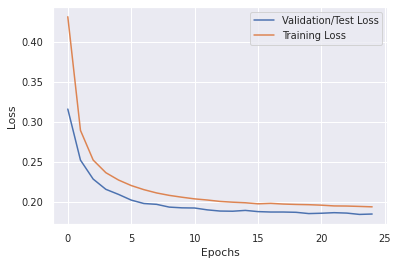

In [68]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(0, len(loss_values))

plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.legend()
plt.show()

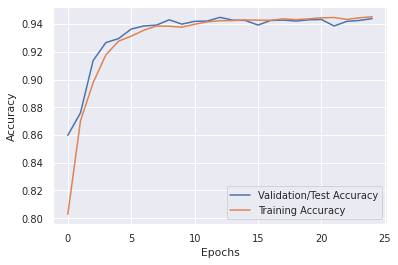

In [69]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(0, len(loss_values))

plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
plt.plot(epochs, acc_values, label='Training Accuracy')
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Classification Reports and Confusion Matrix

In [81]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 79.24%
[[3187  253]
 [ 681  379]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3440
           1       0.60      0.36      0.45      1060

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500



### The accuracy of this simple model is not very satisfactory, with accuracy of around 79%

## Lets build a deeper model

In [91]:
model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=20))
model2.add(Dropout(0.3))

# Hidden Layer 1
model2.add(Dense(180, activation='relu', input_dim=20))
model2.add(Dropout(0.3))

# Hidden Layer 2
model2.add(Dense(90, activation='relu', input_dim=20))
model2.add(Dropout(0.3))

model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 270)               5670      
_________________________________________________________________
dropout_8 (Dropout)          (None, 270)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 180)               48780     
_________________________________________________________________
dropout_9 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 90)                16290     
_________________________________________________________________
dropout_10 (Dropout)         (None, 90)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                

In [92]:
batch_size = 10
epochs = 25

history = model2.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 4s 3ms/step - loss: 0.2664 - accuracy: 0.8983 - val_loss: 0.1629 - val_accuracy: 0.9449
Epoch 2/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1797 - accuracy: 0.9441 - val_loss: 0.1505 - val_accuracy: 0.9538
Epoch 3/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1633 - accuracy: 0.9493 - val_loss: 0.1266 - val_accuracy: 0.9589
Epoch 4/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1509 - accuracy: 0.9540 - val_loss: 0.1234 - val_accuracy: 0.9613
Epoch 5/25
1050/1050 [==============================] - 5s 4ms/step - loss: 0.1437 - accuracy: 0.9562 - val_loss: 0.1256 - val_accuracy: 0.9631
Epoch 6/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1333 - accuracy: 0.9569 - val_loss: 0.1191 - val_accuracy: 0.9629
Epoch 7/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1300 - accuracy: 0.9608 - val_loss: 0.1249 - val_accuracy:

In [98]:
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 96.84%
[[3384   56]
 [  86  974]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3440
           1       0.95      0.92      0.93      1060

    accuracy                           0.97      4500
   macro avg       0.96      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



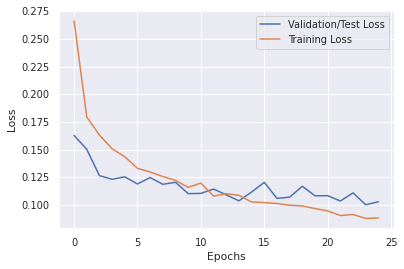

In [96]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(0, len(loss_values))

plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.legend()
plt.show()

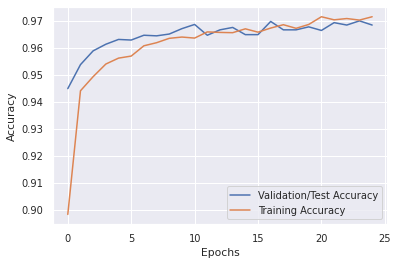

In [97]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(0, len(loss_values))

plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
plt.plot(epochs, acc_values, label='Training Accuracy')
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### The deeper model actually performs better with higher accuracy

In [ ]:
# Test Input 

"""
input_data = {'number_project': [3],
              'average_montly_hours': [160],
              'time_spend_company': [5],
              'Work_accident': [0],
              'promotion_last_5years': [1],
              'last_evaluation': [0.5],
              'satisfaction_level': [0.5],
              'department_RandD': [0],
              'department_accounting': [0],
              'department_hr': [0],
              'department_management': [0],
              'department_marketing': [1],
              'department_product_mng': [0],
              'department_sales': [0],
              'department_support': [0],
              'department_technical': [0],
              'salary_low': [0],
              'salary_medium': [1]}

# Convert to pandas dataframe
input_data = pd.DataFrame(input_data)

# Transform data using sc.transform
input_data = sc.transform(input_data)

# Reshape data for input into our model predict function
input_data = input_data.reshape(1, -1)

# Run prediction for our test sameple, 0 means employee will not leave, 1 means they are likely to leave/resign
model.predict(input_data)

# print probabilities of belonging to either class
model.predict_proba(input_data)
"""
